## 05 Feature Engineering 

This notebook contains feature engineering and preliminary unsupervised model analyis using Principal Component Analysis

In [10]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

import os

#Get current working directory (.\\notebooks) -----HR
cwd = os.getcwd()

#Get parent folder to access (.\\Data) -----HR
parent = os.path.dirname(cwd)

#Get file path to load into environment -----HR
file_path = os.path.join(parent,"Data","stock_and_econ_cleaned.xlsx")

#Load data into environment using the file path variable with appropriate relative path -----HR
stock_and_econ_cleaned = pd.read_excel(file_path)

In [11]:
# Fill missing values with mean -----EP
numeric_columns = stock_and_econ_cleaned.select_dtypes(include=[np.number]).columns
stock_and_econ_cleaned[numeric_columns] = stock_and_econ_cleaned[numeric_columns].fillna(
    stock_and_econ_cleaned[numeric_columns].mean()
)


In [12]:
# List of sector columns -----EP
sector_columns = [
    "Sector_Electrical Utilities & IPPs",
    "Sector_Food & Tobacco",
    "Sector_Healthcare Equipment & Supplies",
    "Sector_Hotels & Entertainment Services",
    "Sector_Insurance",
    "Sector_Investment Banking & Investment Services",
    "Sector_Machinery, Equipment & Components",
    "Sector_Media & Publishing",
    "Sector_Oil & Gas",
    "Sector_Other",
    "Sector_Pharmaceuticals",
    "Sector_Professional & Commercial Services",
    "Sector_Residential & Commercial REIT",
    "Sector_Semiconductors & Semiconductor Equipment",
    "Sector_Software & IT Services"
]

In [13]:
# Check for remaining missing values -----EP
print(f"Number of missing values: {stock_and_econ_cleaned.isna().sum().sum()}")

# Create quarter features
quarter_mapping = {"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4}
stock_and_econ_cleaned['Quarter_Num'] = stock_and_econ_cleaned['Quarter'].map(quarter_mapping)
stock_and_econ_cleaned['Quarter_sin'] = np.sin(2 * np.pi * stock_and_econ_cleaned['Quarter_Num'] / 4)
stock_and_econ_cleaned['Quarter_cos'] = np.cos(2 * np.pi * stock_and_econ_cleaned['Quarter_Num'] / 4)

# Create PE Category numeric mapping
pe_mapping = {
    "Low": 0,
    "Good": 1,
    "High": 2,
    "Craziness": 3
}
stock_and_econ_cleaned['PE_Category_Num'] = stock_and_econ_cleaned['PE_Category'].map(pe_mapping).fillna(0)

# Save updated data, commented out for redundancy
#stock_and_econ_cleaned.to_excel("stock_and_econ_cleaned.xlsx", index=False)

Number of missing values: 0


In [ ]:
# PCA Analysis ----EP
# Select numeric columns excluding Label
pca_data = stock_and_econ_cleaned.select_dtypes(include=[np.number]).drop('Label', axis=1, errors='ignore')

# Scale the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# Print PCA summary
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# Print column names
print("\nColumn names:", stock_and_econ_cleaned.columns.tolist())

In [ ]:
#Convert label to categorical for logistic regression and cross validation ----EP
stock_and_econ_cleaned['Label'] = pd.Categorical(stock_and_econ_cleaned['Label'])

# Split data into train and test sets
X = stock_and_econ_cleaned.drop('Label', axis=1)
y = stock_and_econ_cleaned['Label']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Create the logistic regression model with elastic net
logistic_cv = LogisticRegressionCV(
    Cs=10,  
    cv=5,   
    penalty='elasticnet',
    solver='saga',
    l1_ratios=[0.5], 
    max_iter=1000
)

# Fit the model
logistic_cv.fit(X_train, y_train)

# Get the mean cross-validation scores
mean_scores = logistic_cv.scores_[1].mean(axis=0) 

Explained variance ratio: [0.13137052 0.11207575 0.08816925 0.08288735 0.06789401 0.06502454
 0.06271706 0.05472141 0.04557713 0.04399119 0.04019389 0.03677957
 0.02869247 0.0262735  0.02537909 0.02315029 0.01722386 0.01489905
 0.01323674 0.01130241 0.00469403 0.00374689]
Cumulative explained variance: [0.13137052 0.24344628 0.33161553 0.41450288 0.4823969  0.54742143
 0.61013849 0.6648599  0.71043704 0.75442823 0.79462211 0.83140168
 0.86009415 0.88636765 0.91174674 0.93489702 0.95212089 0.96701994
 0.98025668 0.99155909 0.99625311 1.        ]

Column names: ['Market Value (%)', 'P/E', 'P/CF', 'P/B', 'Debt/Equity', 'ROE', 'ROA', 'Profit Margin', 'Op Margin', 'FCF Gr', 'EBITDA Gr', 'Net Inc Gr', 'GDP CYOY Index', 'CPI YOY Index', 'VIX Index', 'Quarter', 'Year', 'Label', 'COVID_Period', 'Profit_Per_Leverage', 'PE_Category', 'Sector_Electrical Utilities & IPPs', 'Sector_Food & Tobacco', 'Sector_Healthcare Equipment & Supplies', 'Sector_Hotels & Entertainment Services', 'Sector_Insurance'

c:\Users\Hayden Realmuto\Documents\GitHub\team_lambda\teamlambdavenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hayden Realmuto\Documents\GitHub\team_lambda\teamlambdavenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hayden Realmuto\Documents\GitHub\team_lambda\teamlambdavenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hayden Realmuto\Documents\GitHub\team_lambda\teamlambdavenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hayden Realmuto\Documents\GitHub\team_lambda\teamlambdavenv\Lib\site-packages\sklearn\linear_model\_sag

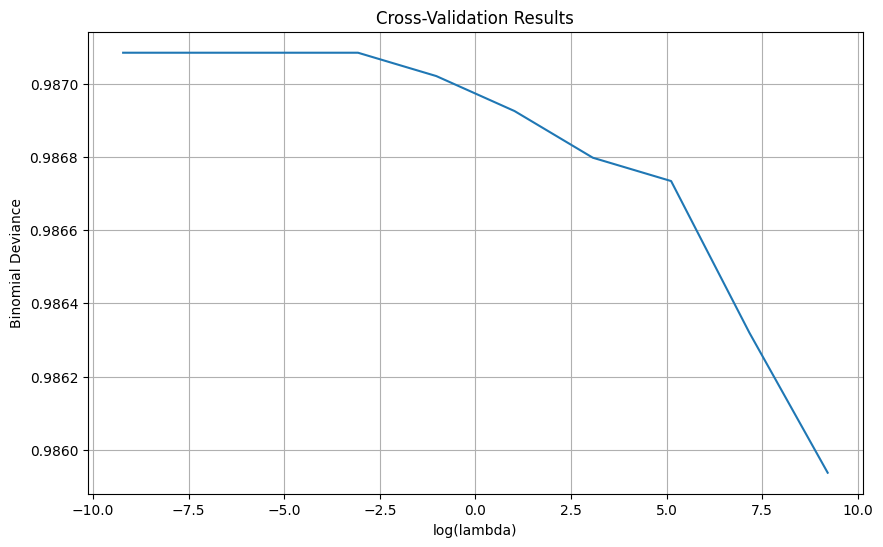

Best lambda value: 0.04641588833612782


In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.log(1/logistic_cv.Cs_), mean_scores)
plt.xlabel('log(lambda)')
plt.ylabel('Binomial Deviance')
plt.title('Cross-Validation Results')
plt.grid(True)
plt.show()

# Print the best lambda value
best_lambda = 1/logistic_cv.C_[0]
print(f"Best lambda value: {best_lambda}") 